In [50]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [51]:
# Reading the CSV file into a DataFrame, using a semicolon as the delimiter
df = pd.read_csv('dataset/bank-full.csv', delimiter=' ')

# Creating a copy of the DataFrame for manipulation
bank_df = df.copy()

# Renaming the 'y' column to 'subscribed'
bank_df.rename({'y': 'subscribed'}, axis=1, inplace=True)

# Defining a dictionary to map 'yes' to 1 and 'no' to 0
result = {'yes': 1, 'no': 0}

# Converting binary columns to numerical values using the defined dictionary
binary = ['subscribed', 'housing', 'loan', 'default']

for column in binary:
    bank_df[column] = bank_df[column].replace(result)


In [52]:
# Transform categorical data to numeric
le = preprocessing.LabelEncoder()

columns_categorical = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in columns_categorical:
    bank_df[col] = le.fit_transform(bank_df[col])
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# Logistic Regression

In [53]:
# Extracting the target variable 'subscribed' (y)
y = bank_df['subscribed']

# Extracting the features (independent variables) by dropping the 'subscribed' column
x = bank_df.drop(columns=['subscribed'])


In [54]:
scaler = StandardScaler()

In [55]:
# Splitting the dataset into training and testing sets for features (x) and target variable (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

# Scaling (transforming) the training features using the scaler
x_train = scaler.fit_transform(x_train)


In [56]:
# Creating an instance of the Logistic Regression model with specified parameters
# - 'solver': Algorithm to use for optimization ('liblinear' is suitable for small datasets)
# - 'C': Inverse of regularization strength (smaller values specify stronger regularization)
# - 'multi_class': Strategy for handling multiple classes ('ovr' stands for One-vs-Rest)
# - 'random_state': Seed for random number generation for reproducibility (set to a fixed value, or None for randomness)
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=None)


In [57]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [58]:
x_test = scaler.transform(x_test)

In [59]:
y_pred = model.predict(x_test)

In [60]:
print("Accuracy:",model.score(x_train,y_train))
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.8929993364299934
Accuracy: 0.885104500718788


In [61]:
# Creating a DataFrame to store the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

# Naming the columns in the DataFrame
cm_df.columns = ['Predicted 0', 'Predicted 1']

# Renaming the index in the DataFrame to represent actual classes
cm_df = cm_df.rename(index={0: "Actual 0", 1: "Actual 1"})


,Predicted 0,Predicted 1
Actual 0,7761,186
Actual 1,853,243


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7947
           1       0.57      0.22      0.32      1096

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [64]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8896383943381622


In [65]:
# Assuming y_pred is the variable containing predicted values from the model
y_pred = model.predict(x_test)

# Creating a DataFrame to store the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))

# Naming the columns in the DataFrame
cm_df.columns = ['Predicted 0', 'Predicted 1']

# Renaming the index in the DataFrame to represent actual classes
cm_df = cm_df.rename(index={0: "Actual 0", 1: "Actual 1"})


,Predicted 0,Predicted 1
Actual 0,7730,217
Actual 1,781,315


### Calculating error


In [66]:
# Find best n_neighbors value
error = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error mean')

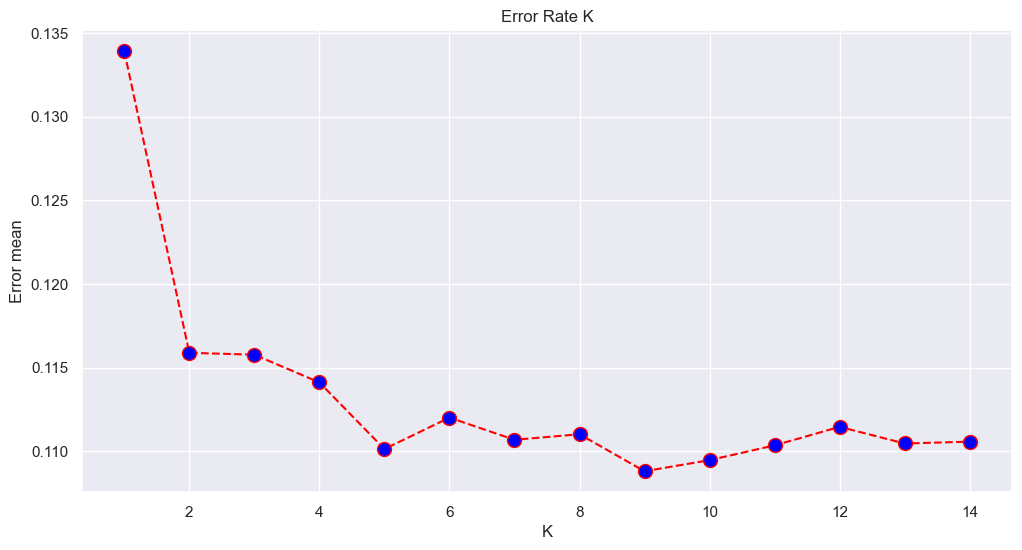

In [67]:
# Creating a line plot to visualize the error rate for different values of K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)

# Adding title and axis labels to the plot
plt.title('Error Rate vs. K', fontsize=16)
plt.xlabel('K', fontsize=14)
plt.ylabel('Error Mean', fontsize=14)


In [68]:
# Creating an instance of the KNeighborsClassifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Training (fitting) the KNN model on the training data
knn.fit(x_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(x_test)

# Calculating and printing the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8879796527700984


In [69]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,7758,189
Actual 1,824,272


# SVM - Supported Vector Machine

In [70]:
# Creating a DataFrame to store the original data
svm_df = bank_df

# Extracting specific columns ('age', 'subscribed', 'balance') and not assigning the result to a variable
svm_df[['age', 'subscribed', 'balance']]

# Creating a DataFrame containing only rows where 'subscribed' is equal to 1
subscribed_df = svm_df[svm_df['subscribed'] == 1]

# Creating a DataFrame containing only rows where 'subscribed' is equal to 0
not_subscribed_df = svm_df[svm_df['subscribed'] == 0]


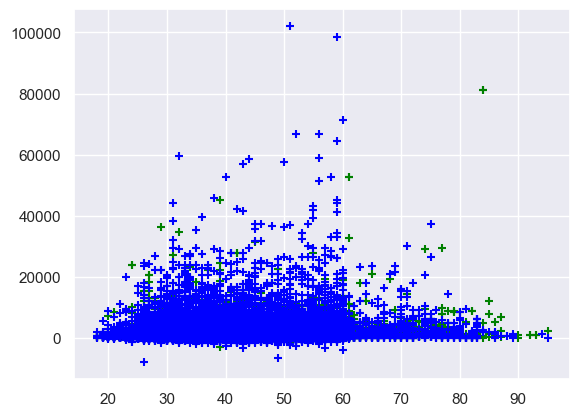

In [71]:
# Creating a scatter plot for the 'subscribed' class
plt.scatter(subscribed_df['age'], subscribed_df['balance'], color='green', marker='+', label='Subscribed')

# Creating a scatter plot for the 'not_subscribed' class
plt.scatter(not_subscribed_df['age'], not_subscribed_df['balance'], color='blue', marker='+', label='Not Subscribed')

# Adding labels and a legend to the plot
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Scatter Plot of Age vs. Balance for Subscribed and Not Subscribed')
plt.legend()

# Displaying the plot
plt.show()


there is no clear separation between the classes ("yes" and "no" in the "subscribed" column), so these two features alone may not be sufficient to discriminate between the classes using a simple linear SVM

# Decision Tree


In [72]:
import pandas as pd

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [74]:
feature_cols = ['age', 'job', 'marital', 'education', 'balance', 'housing','loan','campaign', 'poutcome']

y = bank_df['subscribed']
x =  bank_df[feature_cols]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=1)

In [76]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [77]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8950899439693306


In [78]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,11827,186
Actual 1,1237,314


In [79]:
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

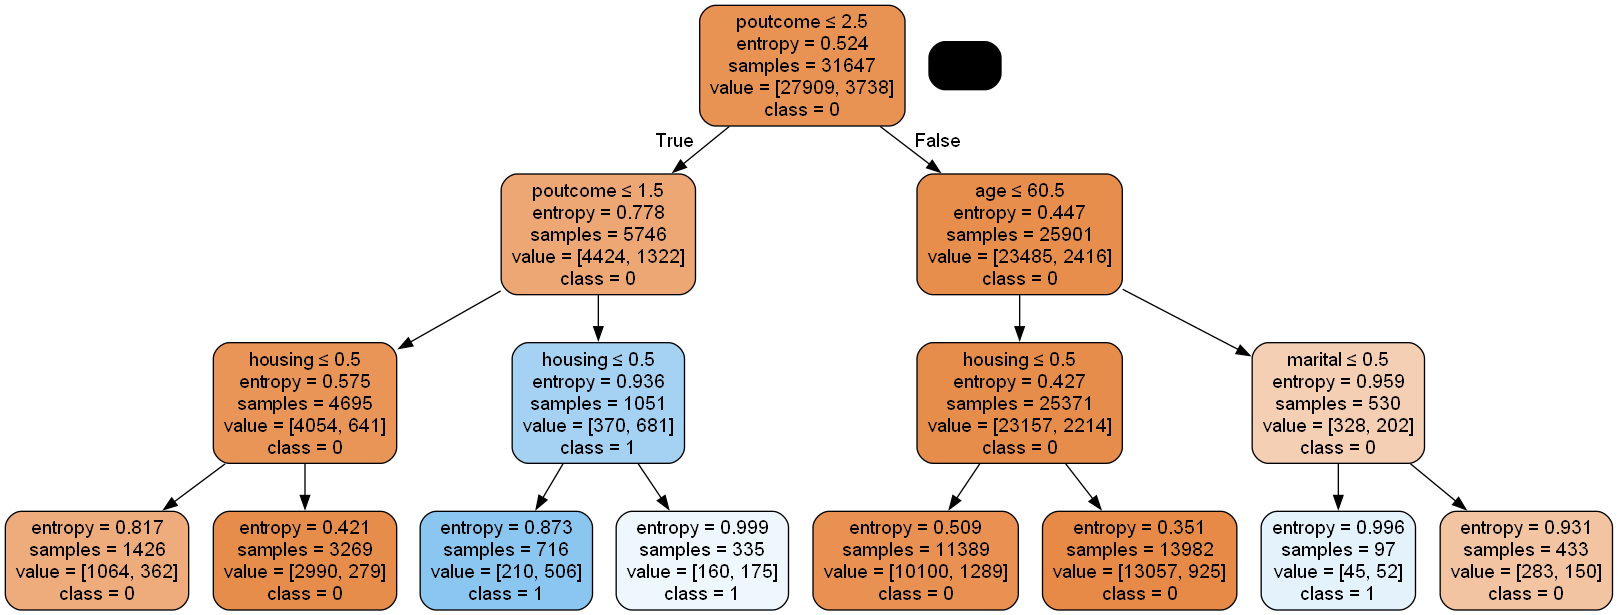

In [80]:
# Creating a StringIO object to store the DOT format data
dot_data = StringIO()

# Exporting the decision tree to the DOT format and storing it in dot_data
tree.export_graphviz(
    clf,
    out_file=dot_data,
    class_names=['0', '1'],  # Replace with your actual class names
    feature_names=feature_cols,  # Replace with your actual feature names
    filled=True,
    rounded=True,
    special_characters=True
)

# Creating a graph from the DOT format data using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Displaying the decision tree image
Image(graph.create_png())

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini')

RandomForestClassifier()

In [83]:
important_feat = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
important_feat

balance      0.383196
age          0.240774
job          0.094714
poutcome     0.089583
campaign     0.075645
education    0.043560
marital      0.032226
housing      0.025011
loan         0.015292
dtype: float64

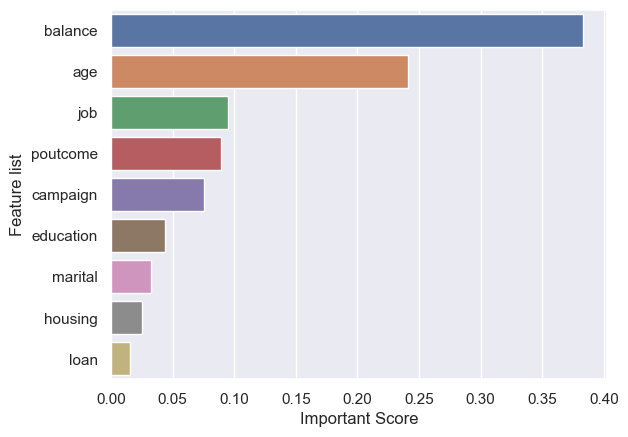

In [84]:
sns.barplot(x=important_feat,y=important_feat.index)

plt.xlabel('Important Score')
plt.ylabel('Feature list')
plt.show()

In [85]:
# specify new x with important features

x = bank_df[['balance','age','job','poutcome','campaign']]
y = bank_df['subscribed']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1)

In [86]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.8747097202255889


In [87]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,7690,303
Actual 1,830,220


# Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

# Creating an instance of the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training (fitting) the Gaussian Naive Bayes model on the training data
gnb.fit(x_train, y_train)

# Making predictions on the test data
y_pred = gnb.predict(x_test)

# Calculating and printing the accuracy of the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy : 0.8686276678093553


In [89]:
cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:"Actual 0",1:"Actual 1"})
cm_df

,Predicted 0,Predicted 1
Actual 0,7785,208
Actual 1,980,70
